In [3]:
words = open('names.txt','r').read().splitlines()


In [4]:
print('Number of words:', len(words))
print('First 10 words:', words[:10])
print(min(len(w) for w in words))
print(max(len(w) for w in words))

Number of words: 32033
First 10 words: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
2
15


Bigram Language Model -> checks for the next character given the current character

In [9]:
b = {}
#  consecutive elements of each word
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
print(b)
print('Number of bigrams:', len(b))

{('<S>', 'e'): 1531, ('e', 'm'): 769, ('m', 'm'): 168, ('m', 'a'): 2590, ('a', '<E>'): 6640, ('<S>', 'o'): 394, ('o', 'l'): 619, ('l', 'i'): 2480, ('i', 'v'): 269, ('v', 'i'): 911, ('i', 'a'): 2445, ('<S>', 'a'): 4410, ('a', 'v'): 834, ('v', 'a'): 642, ('<S>', 'i'): 591, ('i', 's'): 1316, ('s', 'a'): 1201, ('a', 'b'): 541, ('b', 'e'): 655, ('e', 'l'): 3248, ('l', 'l'): 1345, ('l', 'a'): 2623, ('<S>', 's'): 2055, ('s', 'o'): 531, ('o', 'p'): 95, ('p', 'h'): 204, ('h', 'i'): 729, ('<S>', 'c'): 1542, ('c', 'h'): 664, ('h', 'a'): 2244, ('a', 'r'): 3264, ('r', 'l'): 413, ('l', 'o'): 692, ('o', 't'): 118, ('t', 't'): 374, ('t', 'e'): 716, ('e', '<E>'): 3983, ('<S>', 'm'): 2538, ('m', 'i'): 1256, ('a', 'm'): 1634, ('m', 'e'): 818, ('<S>', 'h'): 874, ('r', 'p'): 14, ('p', 'e'): 197, ('e', 'r'): 1958, ('r', '<E>'): 1377, ('e', 'v'): 463, ('v', 'e'): 568, ('l', 'y'): 1588, ('y', 'n'): 1826, ('n', '<E>'): 6763, ('b', 'i'): 217, ('i', 'g'): 428, ('g', 'a'): 330, ('a', 'i'): 1650, ('i', 'l'): 1345,

In [10]:
sorted_b = sorted(b.items(), key=lambda x: x[1], reverse=True)
print('Top 10 bigrams:', sorted_b[:10])

Top 10 bigrams: [(('n', '<E>'), 6763), (('a', '<E>'), 6640), (('a', 'n'), 5438), (('<S>', 'a'), 4410), (('e', '<E>'), 3983), (('a', 'r'), 3264), (('e', 'l'), 3248), (('r', 'i'), 3033), (('n', 'a'), 2977), (('<S>', 'k'), 2963)]


In [11]:
import torch

In [13]:
a = torch.zeros((3,5), dtype=torch.float32)
a

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [15]:
N = torch.zeros((28,28), dtype = torch.int32)

In [17]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [19]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [ ]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [20]:
itos = {i:s for s,i in stoi.items()}

(-0.5, 27.5, 27.5, -0.5)

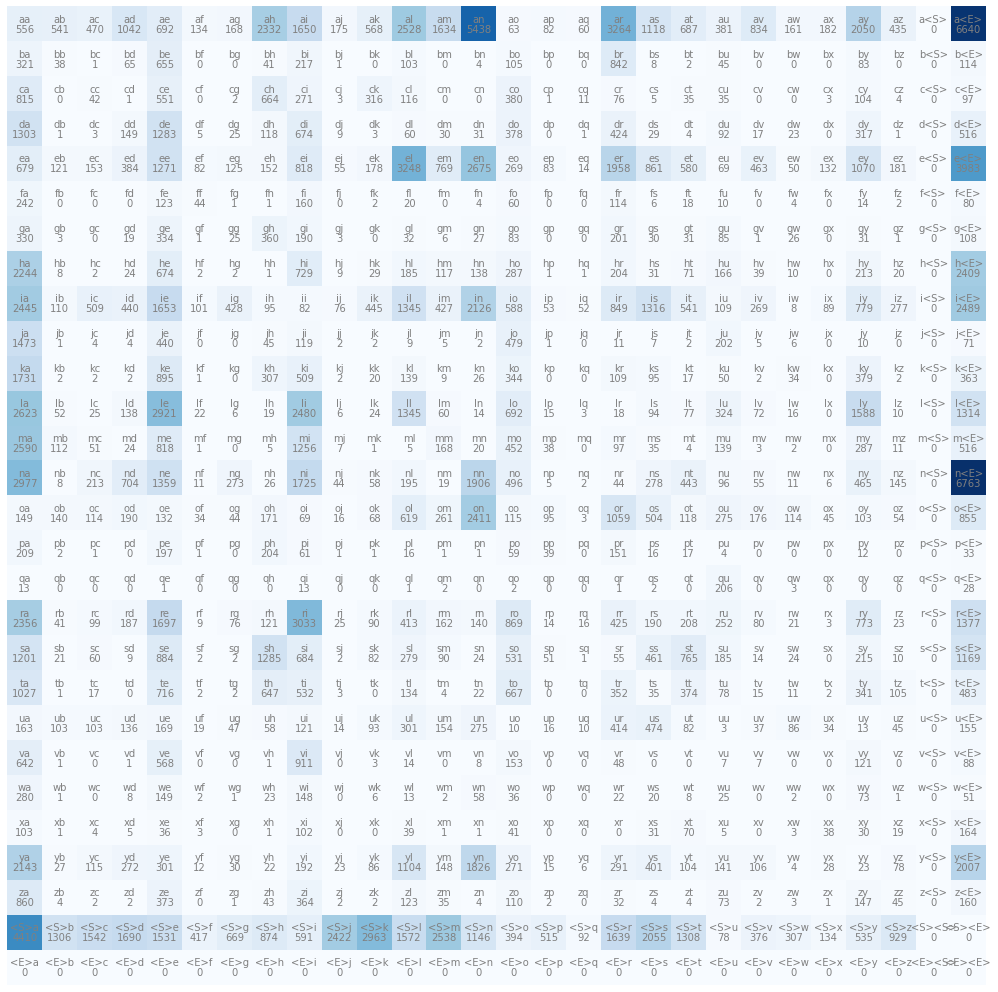

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i,j].item(), ha = 'center', va = 'top', color = 'gray')
    
plt.axis('off')